<a href="https://colab.research.google.com/github/fishitmo/Takeobds/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predictive Maintenance Project Work**

**Problem Description**

One of the primary challenges encountered by companies operating in asset-intensive sectors like manufacturing is the substantial expenses linked to production delays resulting from mechanical issues. Many of these enterprises aim to forecast these problems beforehand to take preventive measures, thereby minimizing the costly repercussions of downtime.

**About Dataset**

**Context**

This an example data source which can be used for Predictive Maintenance Model Building. It consists of the following data:

* Machine conditions and usage: The operating conditions
  of a machine e.g. data collected from sensors.
* Failure history: The failure history of a machine or
  component within the machine.

* Maintenance history: The repair history of a machine,  
  e.g. error codes, previous maintenance activities or
  component replacements.
* Machine features: The features of a machine, e.g.  
  engine size, make and model, location.

**Details**

* **Telemetry Time Series Data (PdM_telemetry.csv):** It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.

* **Error (PdM_errors.csv):** These are errors encountered by the machines while in operating condition. Since, these errors don't shut down the machines, these are not considered as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

* **Maintenance (PdM_maint.csv):** If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations: 1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance) 2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (Reactive Maintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both 2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

* **Failures (PdM_failures.csv):** Each record represents replacement of a component due to failure. This data is a subset of Maintenance data. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

* **Metadata of Machines (PdM_Machines.csv):** Model type & age of the Machines.

To solve the predictive maintenance problem using the provided dataset, you can follow these general steps:

1. **Data Understanding**:
   - Begin by understanding the dataset's structure, the meaning of each column, and the relationships between the tables (if any).
   - Explore the metadata of machines to understand their types and ages.
   - Examine the Telemetry Time Series Data, Error Data, Maintenance Data, and Failure Data to get a sense of the available information.

2. **Data Preprocessing**:
   - Handle missing data: Check for missing values in the dataset and decide how to handle them (e.g., impute or remove rows/columns).
   - Data cleaning: Check for any erroneous or inconsistent data and clean it if necessary.
   - Data transformation: Convert timestamps into a consistent format, if needed. Perform feature engineering to create relevant features for predictive maintenance.

3. **Exploratory Data Analysis (EDA)**:
   - Visualize the data to identify patterns and insights.
   - Examine the distribution of machine conditions, usage, errors, and failures over time.
   - Check for correlations between different features.
   - Analyze the distribution of maintenance activities (proactive and reactive) and failures.

4. **Feature Selection**:
   - Identify relevant features for predictive maintenance. This may include telemetry data, error information, maintenance history, and machine features.
   - Consider techniques like feature importance and correlation analysis to choose the most informative features.

5. **Data Preparation**:
   - Split the dataset into training and testing sets to evaluate model performance.
   - Normalize or scale features if necessary.
   - Handle categorical variables, if any, using techniques like one-hot encoding or label encoding.

6. **Model Selection**:
   - Choose appropriate machine learning or predictive modeling algorithms for your task. Common choices include logistic regression, decision trees, random forests, gradient boosting, or deep learning models like neural networks.
   - Depending on the specific problem within predictive maintenance (e.g., predicting failures or maintenance needs), select the appropriate target variable and model accordingly.

7. **Model Training**:
   - Train the selected model(s) using the training dataset.
   - Tune hyperparameters through techniques like grid search or random search to optimize model performance.
   - Evaluate models using appropriate metrics such as accuracy, precision, recall, F1-score, or AUC-ROC, depending on the problem.

8. **Model Evaluation**:
   - Evaluate the trained models on the testing dataset to assess their performance.
   - Consider using additional techniques like cross-validation for robust evaluation.

9. **Model Interpretation**:
   - Interpret the results and model predictions to understand the factors contributing to maintenance needs or failures.

10. **Deployment**:
    - If the model performs well, consider deploying it in a real-world predictive maintenance system.
    - Ensure the model is integrated into the existing maintenance process and regularly updated with new data.

11. **Monitoring and Maintenance**:
    - Continuously monitor the model's performance in production and update it as needed.
    - Monitor machine conditions and usage to trigger maintenance actions based on model predictions.

12. **Documentation**:
    - Document the entire process, including data preprocessing, feature engineering, model selection, training, and deployment for future reference and collaboration.

Remember that predictive maintenance is an ongoing process that may require iteration and refinement as more data becomes available or as the model's performance is assessed in a real-world environment.

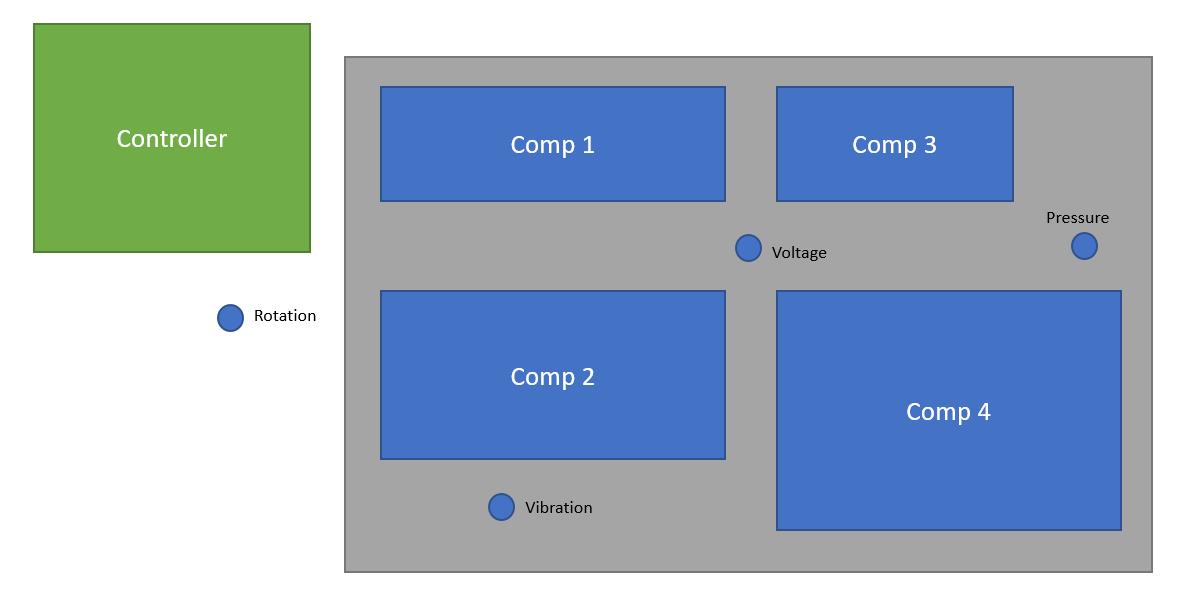

#**Data Sources**

Typical data origins for predictive maintenance issues encompass:

1. Failure history: Record of machine or component failures over time.
2. Maintenance history: Log of machine repairs, including error codes, prior maintenance actions, or component replacements.
3. Machine conditions and usage: Operating parameters of the machine, often obtained from sensor data.
4. Machine features: Characteristics of the machine, such as engine specifications, make and model, and location.

In this instance, the data is sourced from four distinct outlets: real-time telemetry from machines, error messages, historical maintenance logs detailing failures, and machine specifications like type and age.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import itertools
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving PdM_telemetry.csv to PdM_telemetry.csv


In [3]:
filename = next(iter(uploaded))

In [4]:
telemetry = pd.read_csv(filename)

#**Telemetry**

The initial data origin comprises telemetry time-series data, comprising voltage, rotation, pressure, and vibration readings gathered from 100 machines in real-time. These measurements are averaged over hourly intervals throughout the year 2015. Presented below are the initial ten entries from the dataset, along with an overview of the entire dataset.

In [8]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


As an example, below is a plot of voltage values and pressure values for machine ID 1 and 2 for the first 2 months of 2015

Text(0.5, 0, 'Date')

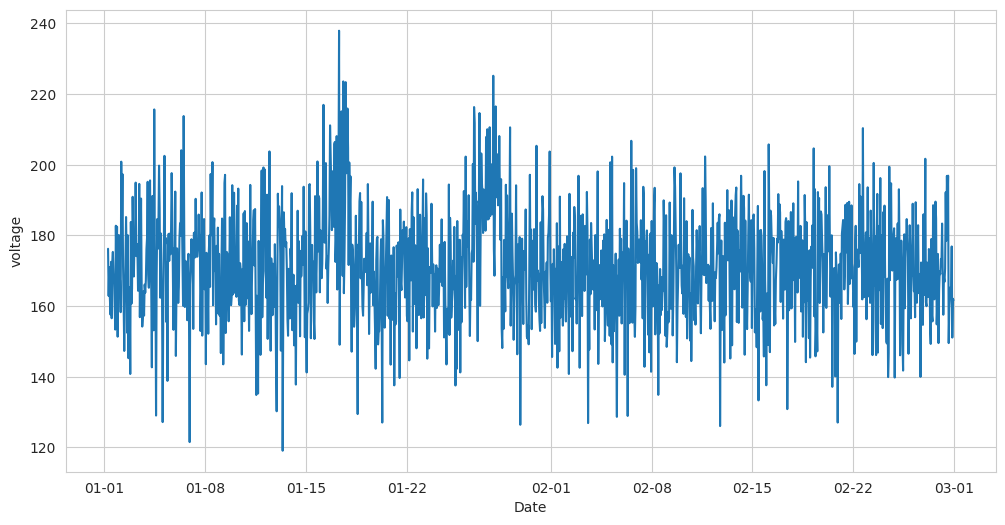

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-03-01')), ['datetime', 'volt']]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

Text(0.5, 0, 'Date')

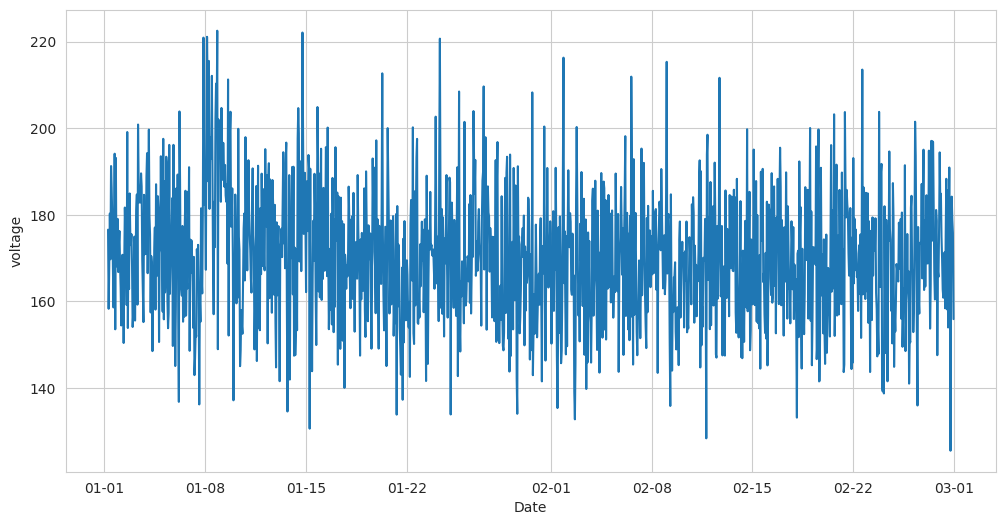

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 2) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-03-01')), ['datetime', 'volt']]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

Text(0.5, 0, 'Date')

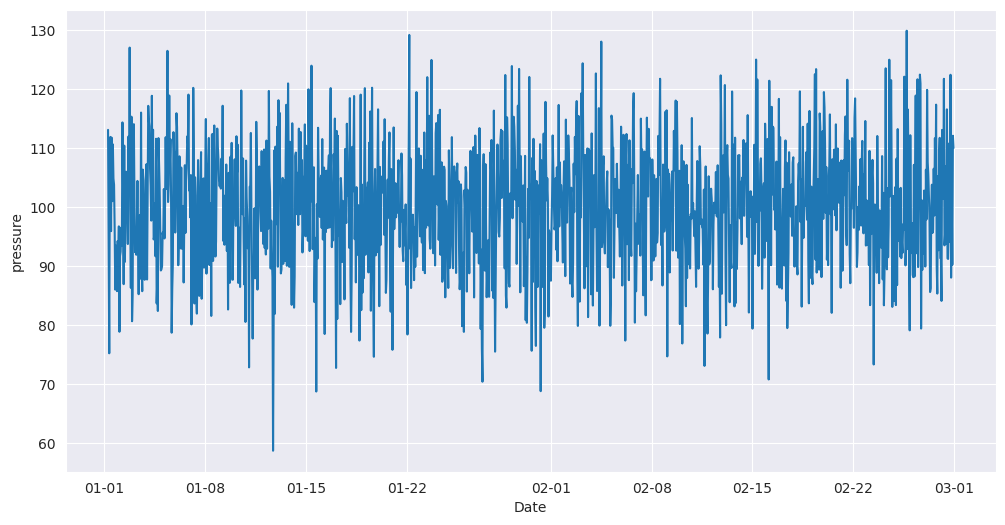

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-03-01')), ['datetime', 'pressure']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['pressure'])
plt.ylabel('pressure')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

Text(0.5, 0, 'Date')

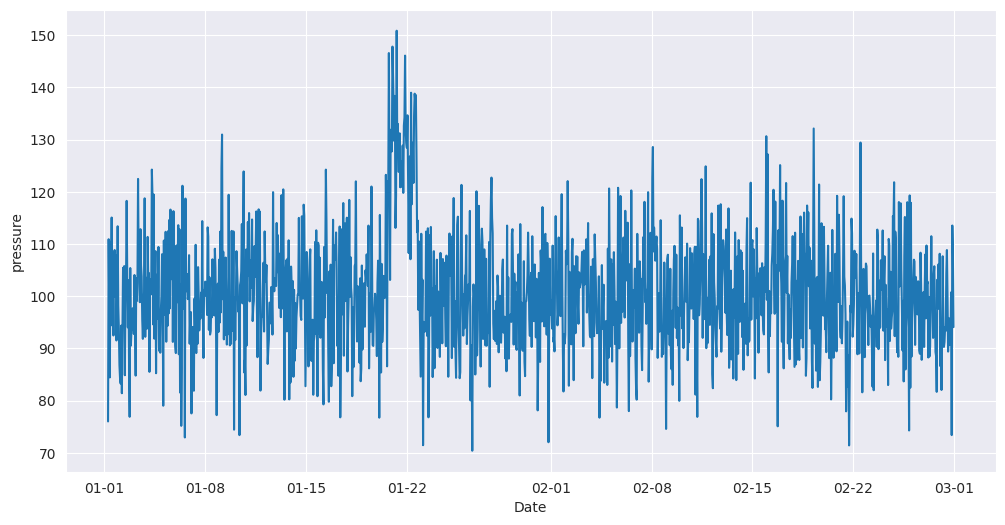

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 2) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-03-01')), ['datetime', 'pressure']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['pressure'])
plt.ylabel('pressure')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

#**Failures**

These are the records of component replacements due to failures. Each record has a date and time, machine ID, and failed component type.

In [55]:
from google.colab import files
uploaded = files.upload()

Saving PdM_failures.csv to PdM_failures.csv


In [56]:
filename = next(iter(uploaded))

In [57]:
failures = pd.read_csv(filename)

In [58]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


Below is the histogram of the failures due to each component. We see that the most failures happen due to component 2.

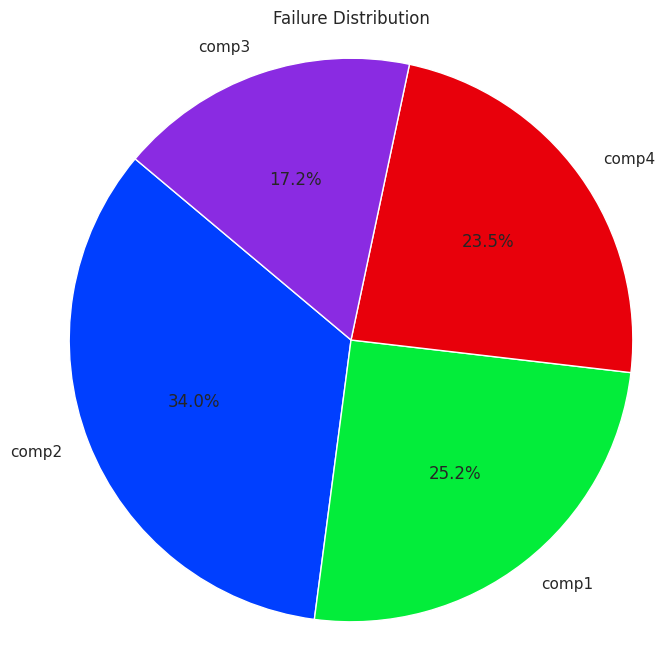

In [60]:
import matplotlib.pyplot as plt

# Assuming 'failures' DataFrame contains the failure data
plt.figure(figsize=(8, 8))

# Get the counts of each failure type
failure_counts = failures['failure'].value_counts()

# Plotting the data as a pie chart
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Failure Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#**Errors**
The second significant data origin pertains to error logs. These logs document non-disruptive errors that occur while the machine remains in operation and do not qualify as failures. The timestamps for these errors are rounded to the nearest hour to align with the hourly telemetry data collection rate.

In [16]:
from google.colab import files
uploaded = files.upload()

Saving PdM_errors.csv to PdM_errors.csv


In [17]:
filename = next(iter(uploaded))

In [18]:
errors = pd.read_csv(filename)

In [19]:
# format datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')

print("Total number of error records: %d" % len(errors.index))
errors.head()

Total number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [22]:
errors.columns

Index(['datetime', 'machineID', 'errorID'], dtype='object')

<ipython-input-32-7d8eb40945f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errors['errorID'].value_counts().index,


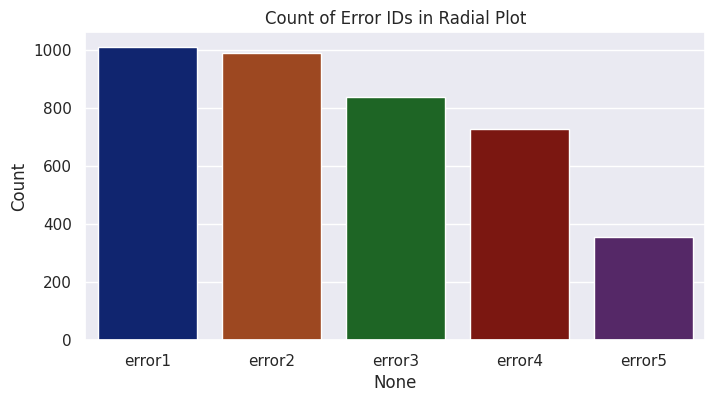

In [32]:
# Assuming 'errors' DataFrame contains the error data
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))

# Create a radial bar plot of the count of error IDs
sns.barplot(x=errors['errorID'].value_counts().index,
            y=errors['errorID'].value_counts().values,
            palette="dark")

plt.ylabel('Count')
plt.title('Count of Error IDs in Radial Plot')
plt.show()


#**Maintenance**

These records encompass both planned and unplanned maintenance activities, covering routine component inspections as well as instances of component replacement prompted by failures. A record is logged when a component is swapped out during a scheduled inspection or due to a breakdown. Those records resulting from breakdowns are termed as failures, as elaborated in subsequent sections. The maintenance data includes records from both 2014 and 2015.

In [33]:
from google.colab import files
uploaded = files.upload()

Saving PdM_maint.csv to PdM_maint.csv


In [34]:
filename = next(iter(uploaded))

In [35]:
maint = pd.read_csv(filename)

In [36]:
# format datetime field which comes in as string
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()

Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


Text(0, 0.5, 'Count')

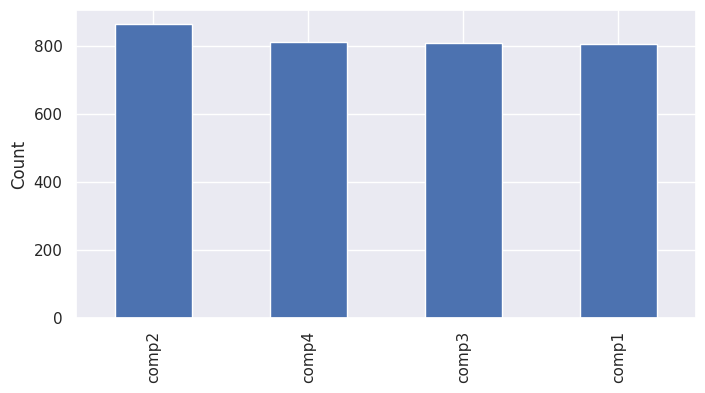

In [37]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

#**Machines**

This data set includes some information about the machines: model type and age (years in service).

In [48]:
from google.colab import files
uploaded = files.upload()

Saving PdM_machines.csv to PdM_machines.csv


In [49]:
filename = next(iter(uploaded))

In [50]:
machines = pd.read_csv(filename)

In [51]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


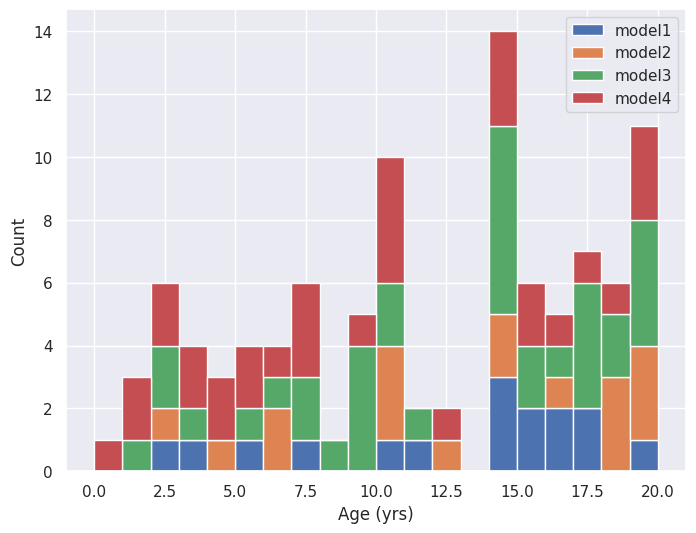

In [54]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

#**Feature Engineering**

The initial phase in predictive maintenance applications involves feature engineering, where various data sources are integrated to develop features that most accurately depict a machine's health status at any given moment. Subsequent sections will explore various feature engineering techniques aimed at generating features derived from the characteristics of each data source.

#**Lag Features from Telemetry**

Telemetry data typically includes timestamps, making it conducive to generating lagging features. A prevalent approach involves selecting a window size for these lag features and computing rolling aggregate statistics such as mean, standard deviation, minimum, maximum, etc., to capture the recent history of the telemetry within the window. In the subsequent steps, we compute the rolling mean and standard deviation of the telemetry data over a 3-hour lag window, updated every 3 hours.

In [64]:
# Claculate mean value for the telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col, aggfunc= 'mean').resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col, aggfunc= 'std').resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [72]:
# telemetry_sd_3h.head()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h


For capturing a longer term effect, 24 hour lag features are also calculated as below.

In [69]:
# Calculate rolling mean over a 24-hour window for telemetry data
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col)
                .rolling(window=24)
                .mean()
                .resample('3H', closed='left', label='right')
                .first()
                .unstack())

# Create DataFrame for rolling mean
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# Repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col)
                .rolling(window=24)
                .std()
                .resample('3H', closed='left', label='right')
                .first()
                .unstack())

# Create DataFrame for rolling standard deviation
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

# Notice that a 24h rolling average is not available at the earliest timepoints
telemetry_mean_24h.head(10)


,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214
12,1,2015-01-02 21:00:00,170.556674,452.267095,98.065860,40.033247
13,1,2015-01-03 00:00:00,168.460525,451.031783,99.273286,38.903462
14,1,2015-01-03 03:00:00,169.772951,447.502464,99.005946,39.389725
15,1,2015-01-03 06:00:00,170.900562,453.864597,100.877342,38.696225
16,1,2015-01-03 09:00:00,169.533156,454.785072,100.050567,39.449734


In [70]:
telemetry_sd_24h.head()

,machineID,datetime,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,13.954518,43.490234,8.061653,5.898069


Next, the columns of the feature datasets created earlier are merged to create the final feature set from telemetry.

In [75]:
# Merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            #  # Use .iloc instead of .ix
                            telemetry_mean_24h.iloc[:, 2:6],  # Use .iloc instead of .ix
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,170.772730,446.610902,100.855776,40.384589,170.773241,446.612525,100.855093,40.384618,14.918908,49.948358,10.046716,5.002063
std,28.86612,9.501004,33.132428,7.411309,3.477508,4.718257,18.075358,4.734948,2.059840,2.260736,7.682014,1.713750,0.799835
min,1.00000,125.532506,211.811184,72.118639,26.569635,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445489,427.563753,96.238075,38.147600,168.070900,441.549418,98.668589,39.354137,13.358744,44.669810,8.924362,4.460346
50%,50.50000,170.431581,448.383875,100.233492,40.146127,170.211185,449.211690,100.097667,40.072808,14.853948,49.613807,9.921421,4.958585
75%,75.25000,176.608728,468.452240,104.404741,42.227902,172.460011,456.368100,101.611121,40.833388,16.394726,54.822037,10.980510,5.484489
max,100.00000,241.420717,586.682904,162.309656,69.311324,220.782618,499.096975,152.394833,61.932124,27.664538,103.819404,28.654103,12.325783


In [76]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


#**Lag Features from Errors**

Like telemetry data, errors come with timestamps. An important difference is that the error IDs are categorical values and should not be averaged over time intervals like the telemetry measurements. Instead, we count the number of errors of each type in a lagging window. We begin by reformatting the error data to have one entry per machine per time at which at least one error occurred:

In [77]:
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


Now we add blank entries for all other hourly timepoints (since no errors occurred at those times):

In [78]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finally, we can compute the total number of errors of each type over the last 24 hours, for timepoints taken every three hours:

In [80]:
# Calculate rolling sum over a 24-hour window for error counts
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                               index='datetime',
                               columns='machineID',
                               values=col)
                .rolling(window=24)
                .sum()  # Use rolling().sum() instead of rolling_sum()
                .resample('3H', closed='left', label='right')
                .first()
                .unstack())

# Create DataFrame for error counts
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()


,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


In [81]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


#**Days Since Last Replacement from Maintenance**

In this scenario, maintenance records are pivotal, providing details on component replacements. Potential features derived from this dataset may include the frequency of component replacements over the last three months, indicating the replacement rate. However, a more pertinent metric would be the duration since the last component replacement, as it's expected to have a stronger correlation with component failures. The longer a component remains in use, the higher the likelihood of degradation.

It's worth noting that creating lagging features from maintenance data is more intricate compared to telemetry and errors. Consequently, features from this dataset are generated in a more customized manner. Such ad-hoc feature engineering is common in predictive maintenance, as domain expertise significantly influences the comprehension of predictive factors. Subsequently, the days elapsed since the last component replacement are computed for each component type as features from the maintenance data.

In [82]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']

    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

# remove dates in 2014 (may have NaN or future component change dates)
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

# replace dates of most recent component change with days since most recent component change
for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')

comp_rep.describe()

<ipython-input-82-960491863f98>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')


,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.525185,51.540806,52.725962,53.834191
std,28.866087,62.491679,59.269254,58.873114,59.707978
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.291667,12.125000,13.125000,13.000000
50%,50.500000,32.791667,29.666667,32.291667,32.500000
75%,75.250000,68.708333,66.541667,67.333333,70.458333
max,100.000000,491.958333,348.958333,370.958333,394.958333


In [83]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


#**Machine Features**

The machine features are directly applicable without additional adjustments. These encompass descriptive details regarding each machine's type and its operational lifespan (number of years in service). Had the age been recorded as the "first use date" for each machine, a transformation would have been required to convert these into numeric values representing the years of service.

Finally, we consolidate all the feature datasets previously generated to form the ultimate feature matrix.

In [84]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-02 06:00:00   180.133784     440.608320        94.137969   
1          1 2015-01-02 09:00:00   176.364293     439.349655       101.553209   
2          1 2015-01-02 12:00:00   160.384568     424.385316        99.598722   
3          1 2015-01-02 15:00:00   170.472461     442.933997       102.380586   
4          1 2015-01-02 18:00:00   163.263806     468.937558       102.726648   

   vibrationmean_3h  voltmean_24h  rotatemean_24h  pressuremean_24h  \
0         41.551544    169.733809      445.179865         96.797113   
1         36.105580    170.614862      446.364859         96.849785   
2         36.094637    169.893965      447.009407         97.715600   
3         40.483002    171.243444      444.233563         96.666060   
4         40.921802    170.792486      448.440437         95.766838   

   vibrationmean_24h  ...  error2count  error3count  error4count  error5count  \
0    

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,...,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,291300.000000,291300.000000,291300.000000,291300.000000,291400.000000
mean,50.50000,170.772730,446.610902,100.855776,40.384589,170.773241,446.612525,100.855093,40.384618,14.918908,...,0.027649,0.027069,0.022907,0.019904,0.009753,53.350748,51.318963,52.512108,53.619118,11.330000
std,28.86612,9.501004,33.132428,7.411309,3.477508,4.718257,18.075358,4.734948,2.059840,2.260736,...,0.166273,0.164429,0.151453,0.140820,0.098797,62.418063,59.140743,58.765904,59.606886,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,155.812721,266.010419,91.057429,35.060087,6.380619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,164.445489,427.563753,96.238075,38.147600,168.070900,441.549418,98.668589,39.354137,13.358744,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,170.431581,448.383875,100.233492,40.146127,170.211185,449.211690,100.097667,40.072808,14.853948,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.25000,176.608728,468.452240,104.404741,42.227902,172.460011,456.368100,101.611121,40.833388,16.394726,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,220.782618,499.096975,152.394833,61.932124,27.664538,...,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


#**Label Construction**

In multi-class classification for predicting failures resulting from a problem, labeling involves selecting a time frame preceding the failure of an asset and labeling the feature records falling within that window as "about to fail due to a problem," while categorizing all other records as "Ã‚Â€Ã‚Âœnormal" The choice of this time window depends on the specific business context: in some cases, predicting failures hours in advance may suffice, while in others, days or weeks may be necessary to accommodate factors such as the arrival of replacement parts.

The objective of the prediction problem in this scenario is to assess the likelihood that a machine will fail in the imminent future due to the failure of a particular component. Specifically, the aim is to determine the probability of a machine experiencing a failure within the next 24 hours due to a failure in one of four components. To achieve this, a categorical failure feature is generated to serve as the label. All records within a 24-hour window preceding a failure of component 1 are labeled as failure=comp1, and similarly for components 2, 3, and 4. Records not falling within 24 hours of a component failure are labeled as failure=none.

In [86]:
# Merge final features with failures data
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')

# Fill missing values backward up to 24 hours
labeled_features = labeled_features.fillna(method='bfill', limit=7)

# Convert the failure column to categorical
labeled_features['failure'] = labeled_features['failure'].astype('category')

# Add 'none' category if it doesn't exist
if 'none' not in labeled_features['failure'].cat.categories:
    labeled_features['failure'] = labeled_features['failure'].cat.add_categories('none')

# Fill missing values with 'none'
labeled_features['failure'] = labeled_features['failure'].fillna('none')

# Display the first few rows
labeled_features.head()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,169.733809,445.179865,96.797113,40.385160,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,170.614862,446.364859,96.849785,39.736826,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,169.893965,447.009407,97.715600,39.498374,...,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,171.243444,444.233563,96.666060,40.229370,...,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,none
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,170.792486,448.440437,95.766838,40.055214,...,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,none


In [87]:
# labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')
# labeled_features = labeled_features.fillna(method='bfill', limit=7) # fill backward up to 24h
# labeled_features = labeled_features.fillna('none')
# labeled_features.head()

Here's an example illustrating records labeled as failure=comp4 in the failure column. Observe that the initial 8 records fall within the 24-hour timeframe before the first documented failure of component 4. Subsequently, the following 8 records are situated within the 24-hour window preceding another failure of component 4.

In [88]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
17,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,172.042428,450.418764,100.284484,52.153213,...,1.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
18,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,171.219623,443.802134,102.358897,52.854420,...,1.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
19,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,172.013443,444.882018,102.578580,52.789794,...,1.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
20,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,170.176321,445.069594,102.359939,51.518719,...,1.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4
21,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,172.932248,444.618018,101.425508,52.135905,...,1.0,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,comp4
22,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,175.121131,443.916392,102.130179,51.653294,...,0.0,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,comp4
23,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,173.407255,446.265950,100.874614,52.529450,...,0.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
24,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,170.757841,440.958228,98.716746,51.746749,...,0.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
1337,1,2015-06-18 09:00:00,169.324639,453.923471,101.313249,53.092274,171.499239,464.569899,101.219344,50.754428,...,0.0,0.0,1.0,89.125,29.125,14.125,134.125,model3,18,comp4
1338,1,2015-06-18 12:00:00,190.691297,441.577271,97.192512,44.025425,171.186404,463.641956,101.709514,51.343164,...,0.0,0.0,1.0,89.250,29.250,14.250,134.250,model3,18,comp4


#**Modelling**